In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
from warnings import filterwarnings
filterwarnings('ignore')


import folium
from folium.plugins import HeatMap


import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go


import sort_dataframeby_monthorweek as sd


from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
df = pd.read_csv('hotel_bookings.csv')
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [34]:
df.shape

(119390, 32)

In [35]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
def rem_null(df):
    df.fillna(0,inplace=True)
    print(df.isna().sum())
rem_null(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [37]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
ACB = ['adults', 'children', 'babies']
for i in ACB:
    print(f'{i} has unique value as {df[i].unique()}')

adults has unique value as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique value as [ 0.  1.  2. 10.  3.]
babies has unique value as [ 0  1  2 10  9]


In [39]:
pd.set_option('display.max_columns',32)

In [40]:
filtereddata = (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filtereddata]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [41]:
data = df[~filtereddata]
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [42]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Analysing Home country of guests

In [43]:
countrywise_data = pd.DataFrame(data,columns=['country','No of guests']).reset_index()

In [44]:
countrywise_data

index country  No of guests
0            0     PRT           NaN
1            1     PRT           NaN
2            2     GBR           NaN
3            3     GBR           NaN
4            4     GBR           NaN
...        ...     ...           ...
119205  119385     BEL           NaN
119206  119386     FRA           NaN
119207  119387     DEU           NaN
119208  119388     GBR           NaN
119209  119389     DEU           NaN

[119210 rows x 3 columns]

## Folium Map

In [45]:
# import folium
# from folium.plugins import HeatMap

basemap = folium.Map(zoom_start=12)
basemap.save("foliummap.html", close_file=True)

In [46]:
basemap = folium.Map()

basemap

In [47]:
#plotly is a advanced label data visualisation library that is extensively used for deployment label visuals

# import plotly.express as px
# import plotly.offline as pyo
# import plotly.graph_objs as go

In [48]:

# Set notebook mode to work in offline
pyo.offline.init_notebook_mode(connected=True)

## Pyplot Map

In [49]:
map_cg = px.choropleth(countrywise_data,
             locations = countrywise_data['country'],
             color = countrywise_data['No of guests'],
             color_continuous_scale="ylorrd",
             hover_name = countrywise_data['country'],
             title = 'Nationality of Guests')
map_cg.write_html("plotlymap.html")
map_cg.show()

## Non colored countries are not in data

In [50]:
attenddata = data[data['is_canceled']==0]

In [51]:
attenddata.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

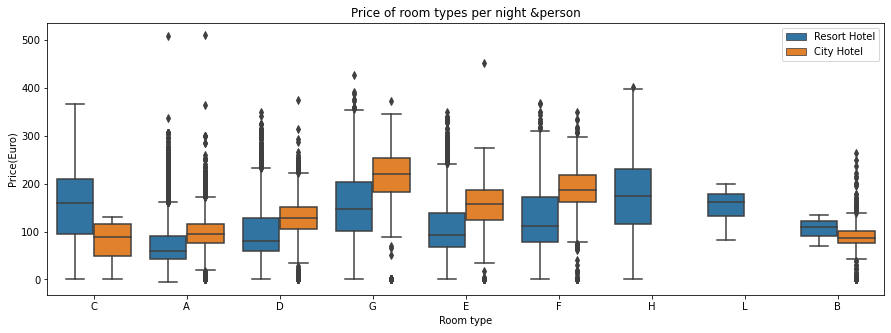

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=attenddata)
plt.title('Price of room types per night &person')
plt.xlabel('Room type')
plt.ylabel('Price(Euro)')
plt.legend()
plt.show()


### Blue = Resort hotel , Orange = City hotel

1. for a blue box top line is 75th percentile data and middle line is 50th percentile data and below line is 25th percentile data

2. The line perpendicular to out of the box has a top most line parallel to 75th percentile data that is 100th percentile data and the down most line is 0th percentile data

#similarly for orange box

3. The data points that we see above 100% line are high values or we can say outliers and datapoints below 0% line are low values or we can say outliers

#### An outlier is a data point that is noticeably different from the rest

#### Outliers are stragglers that are extremely high or extremely low values in a data set that can throw off your stats.

### We can conclude from this that the best distribution of CITY HOTEL is almost tend to G room type && RESORT HOTEL is almost tend to H room type

# Analysing Prices of Hotels across year

In [53]:
data_rh = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_ch = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [54]:
data_rh.head(20)

hotel  is_canceled  lead_time  arrival_date_year  \
0   Resort Hotel            0        342               2015   
1   Resort Hotel            0        737               2015   
2   Resort Hotel            0          7               2015   
3   Resort Hotel            0         13               2015   
4   Resort Hotel            0         14               2015   
5   Resort Hotel            0         14               2015   
6   Resort Hotel            0          0               2015   
7   Resort Hotel            0          9               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   
14  Resort Hotel            0         37               2015   
15  Resort Hotel            0         68               2015   
16  Resort Hotel            0         37               2015   
17  Resort Hotel            0         12               2015   
18  Resort Hotel            0          0               2015   
19  Resort Hotel            0          7               2015   
20  Resort Hotel            0         37               2015   
21  Resort Hotel            0         72               2015   
22  Resort Hotel            0         72               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                July                        27                          1   
1                July                        27                          1   
2                July                        27                          1   
3                July                        27                          1   
4                July                        27                          1   
5                July                        27                          1   
6                July                        27                          1   
7                July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   
14               July                        27                          1   
15               July                        27                          1   
16               July                        27                          1   
17               July                        27                          1   
18               July                        27                          1   
19               July                        27                          1   
20               July                        27                          1   
21               July                        27                          1   
22               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                         0                     0       2       0.0       0   
1                         0                     0       2       0.0       0   
2                         0                     1       1       0.0       0   
3                         0                     1       1       0.0       0   
4                         0                     2       2       0.0       0   
5                         0                     2       2       0.0       0   
6                         0                     2       2       0.0       0   
7                         0                     2       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   
14                        0                     4       2       0.0       0   
15                   

In [55]:
resort_hotel = data_rh.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [56]:
city_hotel = data_ch.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [57]:
final = resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns = ['month','price_resort','price_cityhotel']
final

month  price_resort  price_cityhotel
0       April     75.867816       111.962267
1      August    181.205892       118.674598
2    December     68.410104        88.401855
3    February     54.147478        86.520062
4     January     48.761125        82.330983
5        July    150.122528       115.818019
6        June    107.974850       117.874360
7       March     57.056838        90.658533
8         May     76.657558       120.669827
9    November     48.706289        86.946592
10    October     61.775449       102.004672
11  September     96.416860       112.776582

In [58]:
#To sort according to month
# import sort_dataframeby_monthorweek as sd

In [59]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)
final = sort_data(final,'month')

### To view open 'room-price.html' in files

In [60]:
room_price_over = px.line(final,x='month',y=['price_resort','price_cityhotel'],title='Room price per night over the month')
room_price_over.write_html("room-price.html")
room_price_over.show()

#### We can conclude that the prices in Resort hotel in summer is pretty much High

#### City hotel is much expensive in Spring and Autumn that Resorts

#### Resort hotel costs less comparitively to City hotel excepth in Summer,but whereas City hotels are high in cost

# Analysing Demand Of hotels

In [61]:
data_rh

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
40055             August                        35                         31   
40056             August                        35                         30   
40057             August                        35                         29   
40058             August                        35                         31   
40059             August                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                            0                     0       2       0.0   
1                            0                     0       2       0.0   
2                            0                     1       1       0.0   
3                            0                     1       1       0.0   
4                            0                     2       2       0.0   
...                        ...                   ...     ...       ...   
40055                        2                     8       2       1.0   
40056                        2                     9       2       0.0   
40057                        4                    10       2       0.0   
40058                        4                    10       2       0.0   
40059                        4                    10       2       0.0   

       babies meal country market_segment distribution_channel  \
0           0   BB     PRT         Direct               Direct   
1           0   BB     PRT         Direct               Direct   
2           0   BB     GBR         Direct               Direct   
3           0   BB     GBR      Corporate            Corporate   
4           0   BB     GBR      Online TA                TA/TO   
...       ...  ...     ...            ...                  ...   
40055       0   BB     GBR  Offline TA/TO                TA/TO   
40056       0   BB     IRL         Direct               Direct   
40057       0   BB     IRL         Direct               Direct   
40058       0   HB     GBR  Offline TA/TO                TA/TO   
40059       0   HB     DEU  Offline TA/TO                TA/TO   

       is_repeated_guest  previous_cancellations  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
40055                  0                       0   
40056                  0                       0   
40057                  0                       0   
40058                  0                      

In [62]:
rush_rh = data_rh['arrival_date_month'].value_counts().reset_index()
rush_rh.columns=['Month','No of guessts in resort']
rush_rh

Month  No of guessts in resort
0      August                     3257
1        July                     3137
2     October                     2575
3       March                     2571
4       April                     2550
5         May                     2535
6    February                     2308
7   September                     2102
8        June                     2037
9    December                     2014
10   November                     1975
11    January                     1866

In [63]:
rush_ch = data_ch['arrival_date_month'].value_counts().reset_index()
rush_ch.columns=['Month','No of guests in city hotel']
rush_ch

Month  No of guests in city hotel
0      August                        5367
1        July                        4770
2         May                        4568
3        June                        4358
4     October                        4326
5   September                        4283
6       March                        4049
7       April                        4010
8    February                        3051
9    November                        2676
10   December                        2377
11    January                        2249

In [64]:
rush = rush_ch.merge(rush_rh,on='Month')
rush.columns = ['month','guests rush in city hotel','guests rush in resort']
rush

month  guests rush in city hotel  guests rush in resort
0      August                       5367                   3257
1        July                       4770                   3137
2         May                       4568                   2535
3        June                       4358                   2037
4     October                       4326                   2575
5   September                       4283                   2102
6       March                       4049                   2571
7       April                       4010                   2550
8    February                       3051                   2308
9    November                       2676                   1975
10   December                       2377                   2014
11    January                       2249                   1866

In [65]:
rush = sort_data(rush,'month')
rush

month  guests rush in city hotel  guests rush in resort
0     January                       2249                   1866
1    February                       3051                   2308
2       March                       4049                   2571
3       April                       4010                   2550
4         May                       4568                   2535
5        June                       4358                   2037
6        July                       4770                   3137
7      August                       5367                   3257
8   September                       4283                   2102
9     October                       4326                   2575
10   November                       2676                   1975
11   December                       2377                   2014

### To view open 'rush-graph.html' in files

In [66]:
rush_graph = px.line(rush,x='month',y=['guests rush in resort','guests rush in city hotel'],title= 'No of guests in each month')
rush_graph.write_html("rush-graph.html")
rush_graph.show()

#### For both Resort and City hotel the Guests are fewer in Winter
#### Guests prefer City hotels in Summer
#### City hotels get more guests every month compared to Resorts
#### Peak time for both City hotels and Resorts is Summer

## How long do people stay at the hotels?

In [67]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [68]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [69]:
clean_data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [70]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [71]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

In [72]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay

total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]

In [73]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

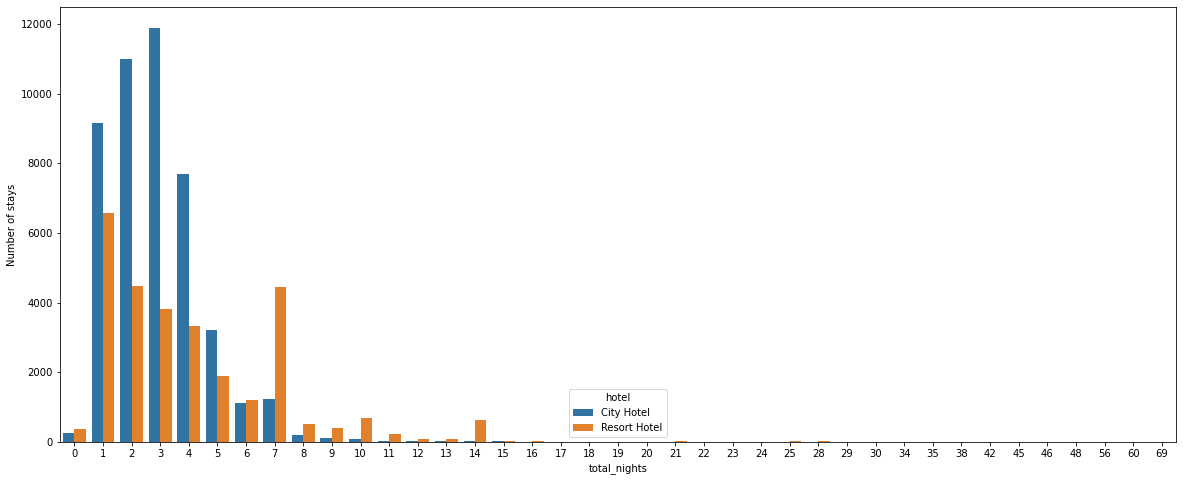

In [74]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

# CO-RELATION

In [75]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                7/1/2015  
1                          0          Check-Out                7/1/2015  
2                          0          Check-Out                7/2/2015  
3                          0          Check-Out                7/2/2015  
4                          1          Check-Out                7/3/2015

In [76]:
data.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.292876           0.016622   
lead_time                          0.292876   1.000000           0.040334   
arrival_date_year                  0.016622   0.040334           1.000000   
arrival_date_week_number           0.008315   0.127046          -0.540373   
arrival_date_day_of_month         -0.005948   0.002306          -0.000121   
stays_in_weekend_nights           -0.001323   0.085985           0.021694   
stays_in_week_nights               0.025542   0.166892           0.031203   
adults                             0.058182   0.117575           0.030266   
children                           0.004851  -0.037878           0.054710   
babies                            -0.032569  -0.021003          -0.013192   
is_repeated_guest                 -0.083745  -0.123209           0.010281   
previous_cancellations             0.110139   0.086025          -0.119905   
previous_bookings_not_canceled    -0.057365  -0.073599           0.029234   
booking_changes                   -0.144832   0.002230           0.031416   
agent                             -0.046770  -0.013114           0.056438   
company                           -0.083594  -0.085854           0.033682   
days_in_waiting_list               0.054301   0.170008          -0.056348   
adr                                0.046492  -0.065018           0.198429   
required_car_parking_spaces       -0.195701  -0.116624          -0.013812   
total_of_special_requests         -0.234877  -0.095949           0.108610   

                                arrival_date_week_number  \
is_canceled                                     0.008315   
lead_time                                       0.127046   
arrival_date_year                              -0.540373   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066572   
stays_in_weekend_nights                         0.018629   
stays_in_week_nights                            0.016047   
adults                                          0.026567   
children                                        0.005556   
babies                                          0.010417   
is_repeated_guest                              -0.031125   
previous_cancellations                          0.035493   
previous_bookings_not_canceled                 -0.021009   
booking_changes                                 0.006311   
agent                                          -0.018225   
company                                        -0.032912   
days_in_waiting_list                            0.022677   
adr                                             0.076281   
required_car_parking_spaces                     0.001980   
total_of_special_requests                       0.026202   

                                arrival_date_day_of_month  \
is_canceled                                     -0.005948   
lead_time                                        0.002306   
arrival_date_year                               -0.000121   
arrival_date_week_number                         0.066572   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016225   
stays_in_week_nights                            -0.028362   
adults                                          -0.001754   
children                                         0.014550   
babies                                          -0.000235   
is_repeated_guest                               -0.006471   
previous_cancellations                          -0.027027   
previous_bookings_not_canceled                  -0.000306   
booking_changes                                  0.011266   
agent                                            0.000159   
company                                          0.003667   
days_in_waiting_list                             0.022532   
adr                                              0.0302

In [77]:
corelation = data.corr()['is_canceled']
corelation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [78]:
corelation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [79]:
corelation.abs().sort_values(ascending=False)[1:]

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [80]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

####    From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
####    However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.
####    I will also not include days_in_waiting_list,booking changes  and arrival_date_year.

####    The most important feature to exclude is the "reservation_status":

In [81]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [82]:
list_not=['days_in_waiting_list','arrival_date_year']

In [83]:
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [84]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']

In [85]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [86]:
data_cat=data[cat_features]

In [87]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015

In [88]:
data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])

In [89]:
data_cat['year'] = data_cat['reservation_status_date'].dt.year
data_cat['month'] = data_cat['reservation_status_date'].dt.month
data_cat['day'] = data_cat['reservation_status_date'].dt.day

In [90]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [91]:
data_cat['cancellation'] = data['is_canceled']
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  \
0                  C   No Deposit     Transient  2015      7    1   
1                  C   No Deposit     Transient  2015      7    1   
2                  A   No Deposit     Transient  2015      7    2   
3                  A   No Deposit     Transient  2015      7    2   
4                  A   No Deposit     Transient  2015      7    3   

   cancellation  
0             0  
1             0  
2             0  
3             0  
4             0

# Handelling Categorical data

 ## Mean Encoding

In [92]:
cols = data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [93]:
for col in cols:
    dict = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict)

In [94]:
data_cat

hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330827       0.28402       0.407864   
2                   0.174868            0.391567       0.28402       0.407864   
3                   0.220568            0.391567       0.28402       0.407864   
4                   0.410598            0.391567       0.28402       0.407864   
...                      ...                 ...           ...            ...   
119385              0.410598            0.391567       0.28402       0.407864   
119386              0.410598            0.292683       0.28402       0.407864   
119387              0.410598            0.318108       0.28402       0.407864   
119388              0.410598            0.391567       0.28402       0.407864   
119389              0.410598            0.391567       0.28402       0.407864   

        year  month  day  cancellation  
0       2015      7    1             0  
1       2015      7    1             0  
2       2015      7    2             0  
3       2015      7    2             0  
4       2015      7    3             0  
...      ...    ...  ...           ...  
119385  2017      9    6             0  
119386  2017      9    7             0  
119387  2017      9    7             0  
119388  2017      9    7             0  
119389  2017      9    7             0  

[119210 rows x 12 columns]

In [95]:
dataframe = pd.concat([data_cat,data[num_features]],axis=1)
dataframe.drop('cancellation',axis=1,inplace = True)
dataframe

hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330827       0.28402       0.407864   
2                   0.174868            0.391567       0.28402       0.407864   
3                   0.220568            0.391567       0.28402       0.407864   
4                   0.410598            0.391567       0.28402       0.407864   
...                      ...                 ...           ...            ...   
119385              0.410598            0.391567       0.28402       0.407864   
119386              0.410598            0.292683       0.28402       0.407864   
119387              0.410598            0.318108       0.28402       0.407864   
119388              0.410598            0.391567       0.28402       0.407864   
119389              0.410598            0.391567       0.28402       0.407864   

        year  month  day  is_canceled  lead_time  arrival_date_week_number  \
0       2015      7    1            0        342                        27   
1       2015      7    1            0        737                        27   
2       2015      7    2            0          7                        27   
3       2015      7    2            0         13                        27   
4       2015      7    3            0         14                        27   
...      ...    ...  ...          ...        ...                       ...   
119385  2017      9    6            0         23                        35   
119386  2017      9    7            0        102                        35   
119387  2017      9    7            0         34                        35   
119388  2017      9    7            0        109                        35   
119389  2017      9    7            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                  

## Handelling Outliers

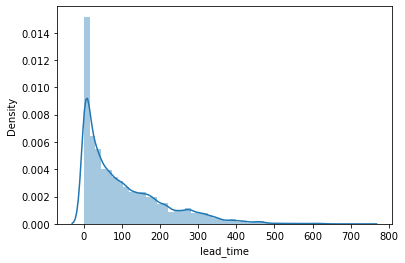

In [96]:
#distribution plot

sns.distplot(dataframe['lead_time'])
plt.show()

### ->The outqueued data are Outliers

### -> So that we take the log values of 'lead_time

In [97]:

def handle_outliers(col):
    dataframe[col] = np.log1p(dataframe[col])

In [98]:
handle_outliers('lead_time')

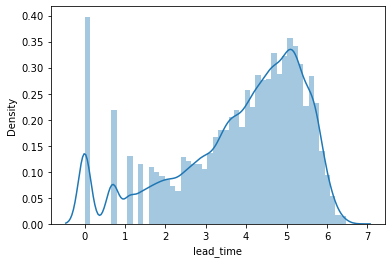

In [99]:
sns.distplot(dataframe['lead_time'])
plt.show()

In [100]:
#adr

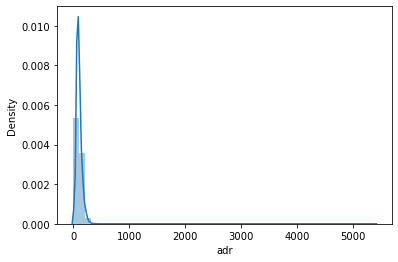

In [101]:
sns.distplot(dataframe['adr'])
plt.show()

In [102]:
handle_outliers('adr')

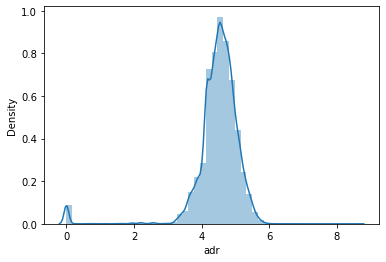

In [103]:
sns.distplot(dataframe['adr'].dropna())
plt.show()
#dropna here is used for missing value

## Seperating the columns that are used for th ML model

In [104]:
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel

In [105]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [106]:
dataframe.dropna(inplace = True)

In [107]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces 

In [108]:
y = dataframe['is_canceled']
x = dataframe.drop('is_canceled',axis = 1)

In [109]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005,random_state=0))

In [110]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [111]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [112]:
cols = x.columns

In [113]:
sel_fea = cols[feature_sel_model.get_support()]

In [114]:
print(f'total features {x.shape[1]}')
print(f'selected features {len(sel_fea)}')

total features 28
selected features 14


In [115]:
x = x[sel_fea]
x

deposit_type  year  month  day  lead_time  arrival_date_week_number  \
0            0.28402  2015      7    1   5.837730                        27   
1            0.28402  2015      7    1   6.603944                        27   
2            0.28402  2015      7    2   2.079442                        27   
3            0.28402  2015      7    2   2.639057                        27   
4            0.28402  2015      7    3   2.708050                        27   
...              ...   ...    ...  ...        ...                       ...   
119385       0.28402  2017      9    6   3.178054                        35   
119386       0.28402  2017      9    7   4.634729                        35   
119387       0.28402  2017      9    7   3.555348                        35   
119388       0.28402  2017      9    7   4.700480                        35   
119389       0.28402  2017      9    7   5.327876                        35   

        adults  children  previous_cancellations  booking_changes  company  \
0            2       0.0                       0                3      0.0   
1            2       0.0                       0                4      0.0   
2            1       0.0                       0                0      0.0   
3            1       0.0                       0                0      0.0   
4            2       0.0                       0                0      0.0   
...        ...       ...                     ...              ...      ...   
119385       2       0.0                       0                0      0.0   
119386       3       0.0                       0                0      0.0   
119387       2       0.0                       0                0      0.0   
119388       2       0.0                       0                0      0.0   
119389       2       0.0                       0                0      0.0   

             adr  required_car_parking_spaces  total_of_special_requests  
0       0.000000                            0                          0  
1       0.000000                            0                          0  
2       4.330733                            0                          0  
3       4.330733                            0                          0  
4       4.595120                            0                          1  
...          ...                          ...                        ...  
119385  4.576153                            0                          0  
119386  5.422436                            0                          2  
119387  5.067079                            0                          4  
119388  4.657763                            0                          0  
119389  5.025195                            0                          2  

[119209 rows x 14 columns]

## Applying Machine Learning Algorithm
## Cross validating the Model

In [116]:
# from sklearn.model_selection import cross_val_score, train_test_split

In [117]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [118]:
# from sklearn.linear_model import LogisticRegression

In [119]:
logreg = LogisticRegression()

In [120]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred = logreg.predict(X_test)

In [122]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [123]:
# from sklearn.metrics import accuracy_score, confusion_matrix

In [124]:
confusion_matrix(y_test,y_pred)

array([[15928,  2711],
       [ 5699,  5465]], dtype=int64)

In [125]:
accuracy_score(y_test,y_pred)

0.7178136429218535

In [126]:
score = cross_val_score(logreg,x,y,cv =10)

In [127]:
score.mean()

0.6992006759826576